### Diabetes Prediction 

# Project Steps
1. Project Introduction
2. Data Gathering
3. Data Assessment
4. Data cleaning
5. Data Preprocessing 
6. Model exploration

In [43]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt  
%matplotlib inline 

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, VotingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
#from lightgbm import LGBMClassifier

from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import RandomizedSearchCV

import warnings  
warnings.filterwarnings('ignore')

#### Data Assessment


In [44]:
data = pd.read_csv("data\diabetes.csv") 
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [45]:
data.shape

(768, 9)

In [46]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [48]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

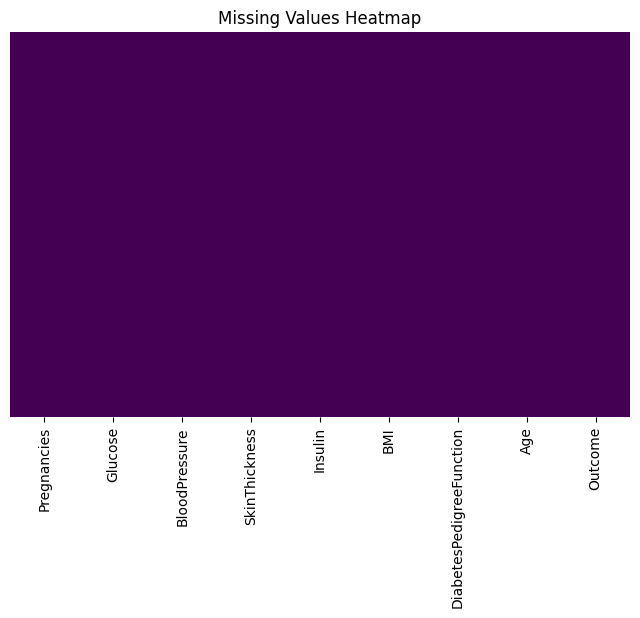

In [49]:
plt.figure(figsize=(8, 5))
sns.heatmap(data.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

In [50]:
data.duplicated().sum()

0

In [51]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## check for outlires 

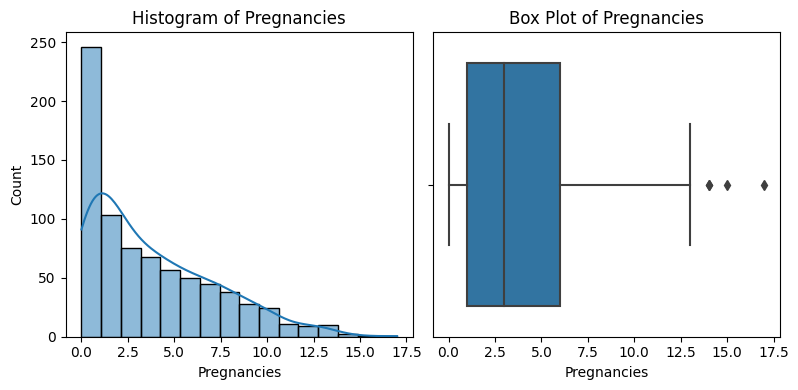

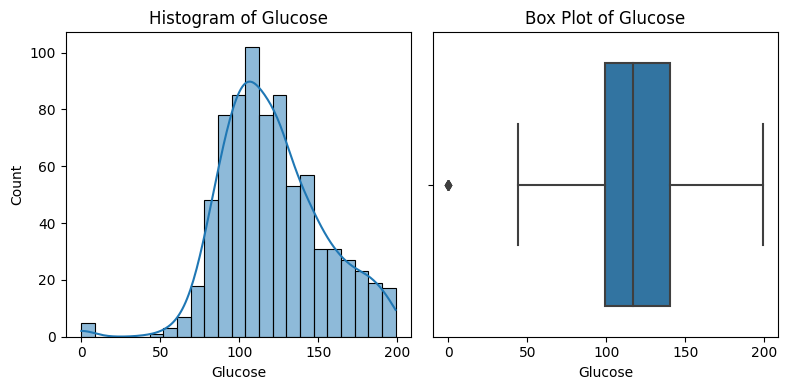

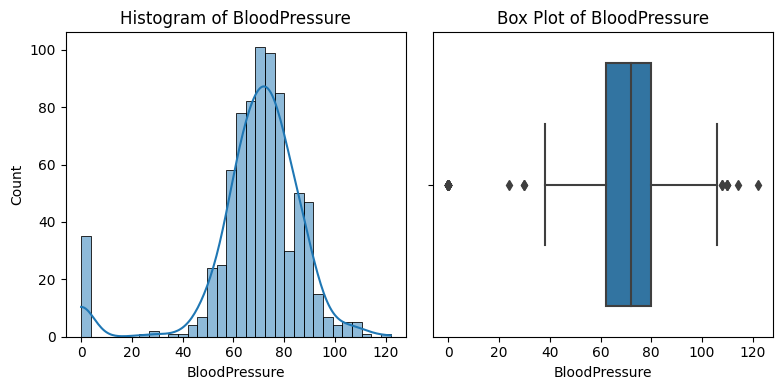

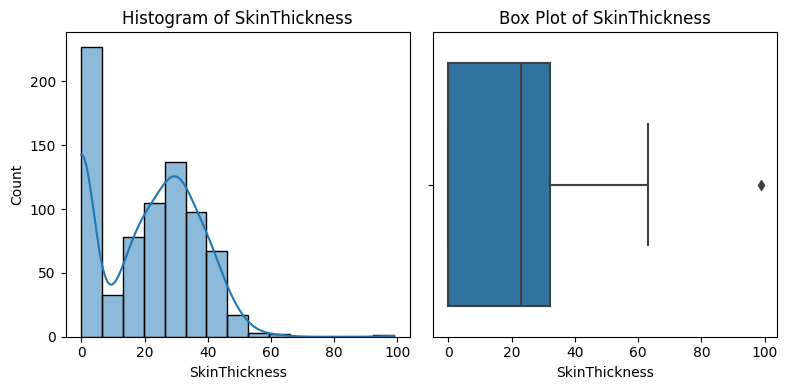

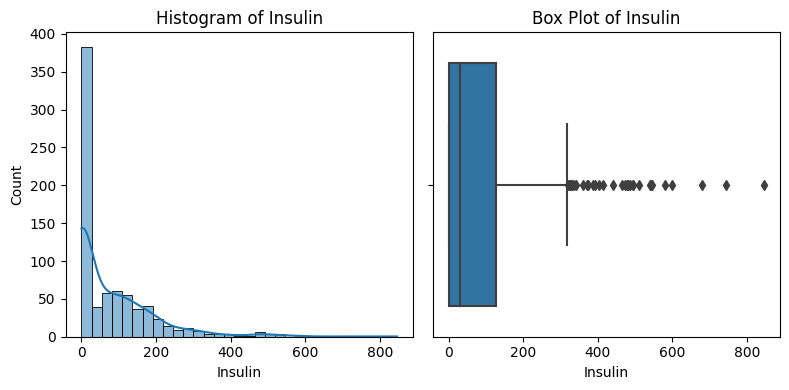

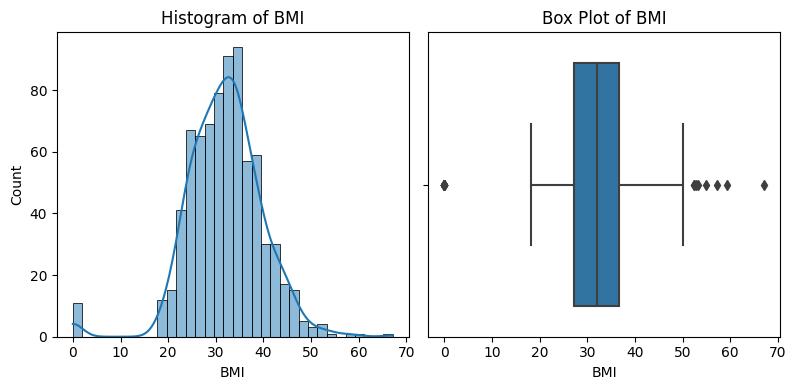

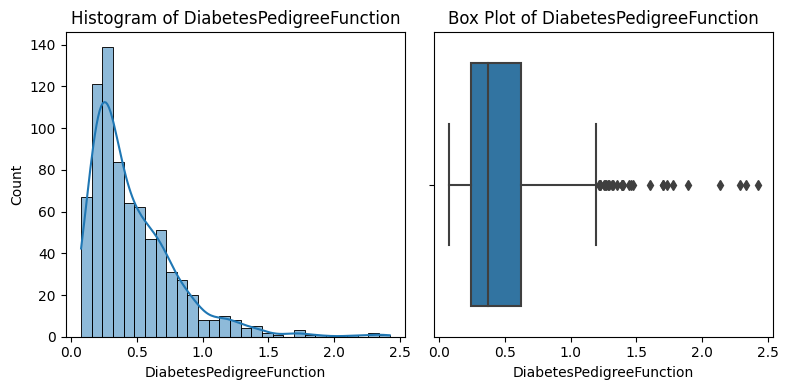

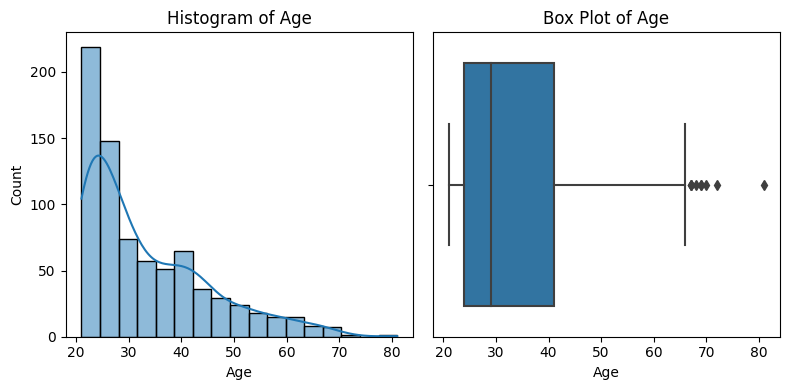

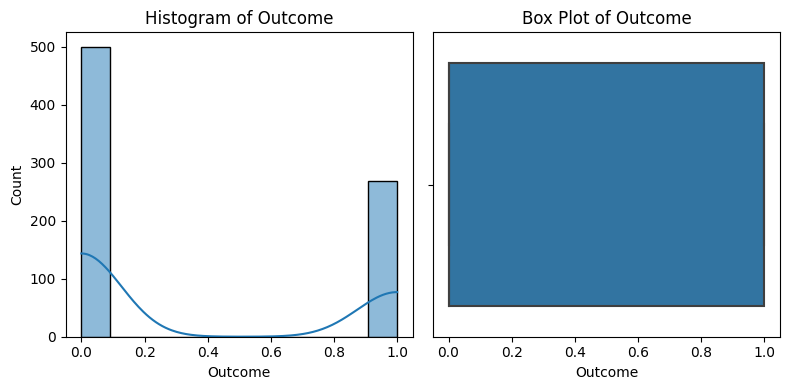

In [52]:
# Histograms and Box Plots for numerical columns
numerical_cols = data.select_dtypes(include=['number']).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(data[col], kde=True)
    plt.title(f'Histogram of {col}')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.title(f'Box Plot of {col}')
    
    plt.tight_layout()
    plt.show()

In [53]:
import numpy as np
from scipy import stats

# Define a threshold for the Z-score (e.g., 3.0 for extreme outliers)
threshold = 3.0

# Calculate the Z-scores for each numeric column
z_scores = np.abs(stats.zscore(data.select_dtypes(include=['number'])))

# Create a DataFrame to store the Z-scores
z_score_df = pd.DataFrame(z_scores, columns=data.select_dtypes(include=['number']).columns)

# Find and print the rows with outliers for each numeric feature
outlier_indices = np.where(z_scores > threshold)
outlier_rows = set(outlier_indices[0])  # Get unique row indices with outliers

# Print the rows with outliers
for row_index in outlier_rows:
    print(f"Outlier detected in row {row_index}:\n")
    print(data.iloc[row_index])
    print("\n")

Outlier detected in row 4:

Pregnancies                   0.000
Glucose                     137.000
BloodPressure                40.000
SkinThickness                35.000
Insulin                     168.000
BMI                          43.100
DiabetesPedigreeFunction      2.288
Age                          33.000
Outcome                       1.000
Name: 4, dtype: float64


Outlier detected in row 7:

Pregnancies                  10.000
Glucose                     115.000
BloodPressure                 0.000
SkinThickness                 0.000
Insulin                       0.000
BMI                          35.300
DiabetesPedigreeFunction      0.134
Age                          29.000
Outcome                       0.000
Name: 7, dtype: float64


Outlier detected in row 8:

Pregnancies                   2.000
Glucose                     197.000
BloodPressure                70.000
SkinThickness                45.000
Insulin                     543.000
BMI                          30.500


## Issues to Fix
1. Remove Outliers 

In [54]:
data = data.drop(index=list(outlier_rows))

In [ ]:
# Print the number of outliers after removal
print(f"Number of outliers after removal: {0 if outlier_rows is None else len(outlier_rows)}")

# You can also compare the statistics of the dataset before and after removal
print("\nStatistics before removal of outliers:")
print(data.describe())

if outlier_rows is not None:
    print("\nStatistics after removal of outliers:")
    print(outlier_rows.describe())

In [55]:
data.shape

(688, 9)

### Model Exploration

In [56]:
X = data.drop("Outcome", axis=1) 
y = data["Outcome"] 

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)  

print("X-Training Shape:- ", X_train.shape) 
print("X-Testing Shape:- ", X_test.shape) 
print("y-Training Shape:- ", y_train.shape) 
print("y-Testing Shape:- ", y_test.shape) 

X-Training Shape:-  (550, 8)
X-Testing Shape:-  (138, 8)
y-Training Shape:-  (550,)
y-Testing Shape:-  (138,)


#### Building the model 

#### Saving the model  

It seems like Catboost in more Robust as compare to other models, so we will save Catboost Classifier as our final model

In [57]:
import joblib 
joblib.dump(catboost, "model.pkl") 
model = joblib.load('model.pkl' ) 
model.predict(X_test)

NameError: name 'catboost' is not defined

In [ ]:
obj = model.predict([[6,148,72,35,0,33.6,0.627,50]])

In [ ]:
obj

array([1], dtype=int64)

In [ ]:
joblib.dump(xgb1, "XGboost.pkl") 

['XGboost.pkl']